In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder



In [2]:
# Load the dataset
insurance_df = pd.read_csv("/content/insurance.csv")



In [3]:
# Check for missing values
insurance_df.isnull().sum()



age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
# Encode categorical variables: 'sex', 'smoker', 'region'
label_encoder = LabelEncoder()

insurance_df['sex'] = label_encoder.fit_transform(insurance_df['sex'])
insurance_df['smoker'] = label_encoder.fit_transform(insurance_df['smoker'])
insurance_df['region'] = label_encoder.fit_transform(insurance_df['region'])



In [5]:
# Define features (X) and target variable (y)
X = insurance_df.drop('charges', axis=1)
y = insurance_df['charges']



In [6]:
# Split the dataset into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [7]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [8]:
# Make predictions on the test set
y_pred = model.predict(X_test)



In [9]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
rss = np.sum(np.square(y_test - y_pred))
explained_var = explained_variance_score(y_test, y_pred)

# Calculate adjusted R-squared
n = len(y_test)
p = X_test.shape[1]
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

# Display the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2) Score: {r2}")
print(f"Adjusted R-squared Score: {adj_r2}")
print(f"Residual Sum of Squares (RSS): {rss}")
print(f"Explained Variance Score: {explained_var}")


Mean Absolute Error (MAE): 4186.508898366433
Mean Squared Error (MSE): 33635210.431178406
Root Mean Squared Error (RMSE): 5799.587091438356
R-squared (R2) Score: 0.7833463107364539
Adjusted R-squared Score: 0.7783657661556826
Residual Sum of Squares (RSS): 9014236395.555813
Explained Variance Score: 0.7836717590532514


The linear regression model seems to be performing reasonably well, explaining approximately 78% of the variance in medical insurance charges. However, there is still some room for improvement in reducing prediction errors.

Factors like smoking status ('smoker') and other features in the dataset are significant predictors of insurance charges, as indicated by their coefficients. Quitting smoking or encouraging individuals to avoid smoking could lead to lower insurance costs.

The relatively high RMSE suggests that the model sometimes makes substantial prediction errors. Must explore more advanced models or feature engineering techniques to further improve accuracy.

Examining feature interactions and checking for multicollinearity among features could affect model performance.




In [10]:
# Get feature coefficients
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': model.coef_})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)
print(feature_importance)



    Feature   Coefficient
4    smoker  23647.818096
3  children    425.091456
2       bmi    335.781491
0       age    257.056264
1       sex    -18.791457
5    region   -271.284266


The largest positive coefficient is associated with the 'smoker' feature. This means that being a smoker has a significant positive impact on medical insurance charges.

Gender ('sex') and region have relatively small effects on insurance charges compared to the other variables in the model.

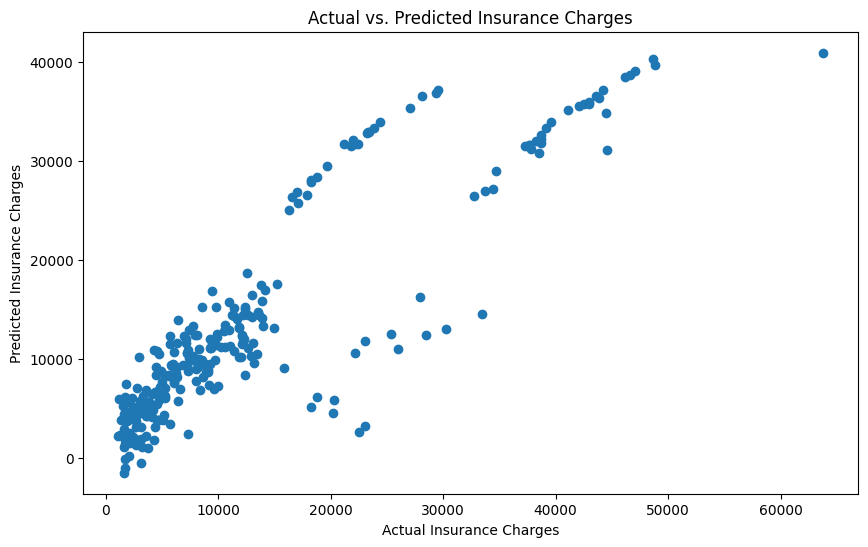

In [11]:
# Visualization: Scatterplot of actual vs. predicted charges
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Insurance Charges")
plt.ylabel("Predicted Insurance Charges")
plt.title("Actual vs. Predicted Insurance Charges")
plt.show()

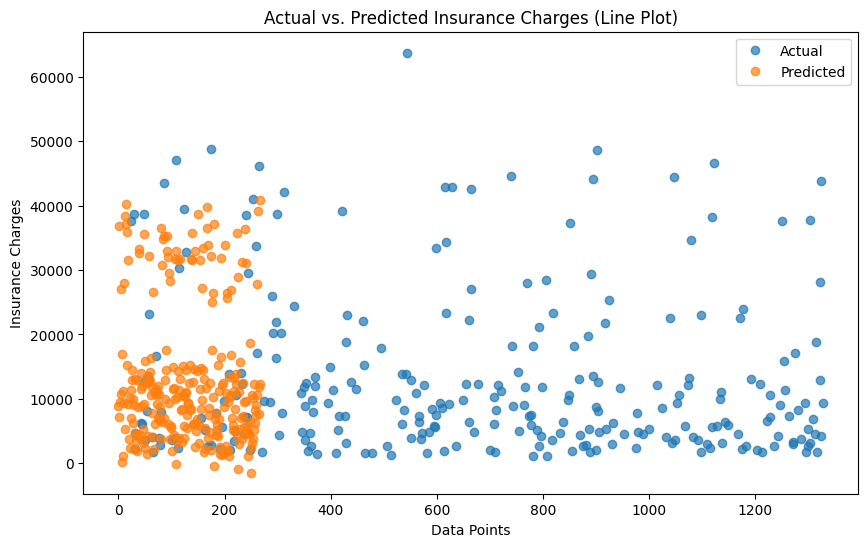

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual', marker='o', linestyle='', alpha=0.7)
plt.plot(y_pred, label='Predicted', marker='o', linestyle='', alpha=0.7)
plt.xlabel("Data Points")
plt.ylabel("Insurance Charges")
plt.title("Actual vs. Predicted Insurance Charges (Line Plot)")
plt.legend()
plt.show()




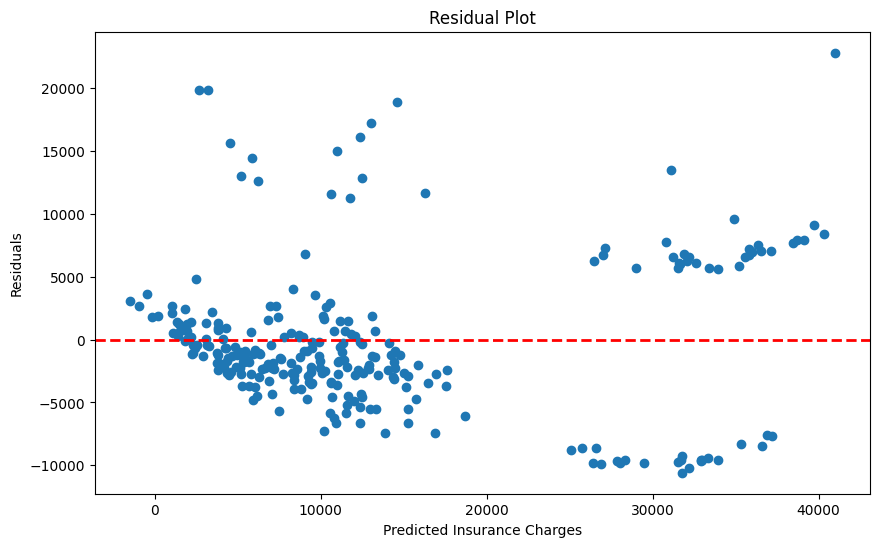

In [14]:
# Calculate the residuals
residuals = y_test - y_pred

# Create a residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.xlabel("Predicted Insurance Charges")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()




 A well-behaved residual plot should exhibit randomness and not follow any specific pattern.

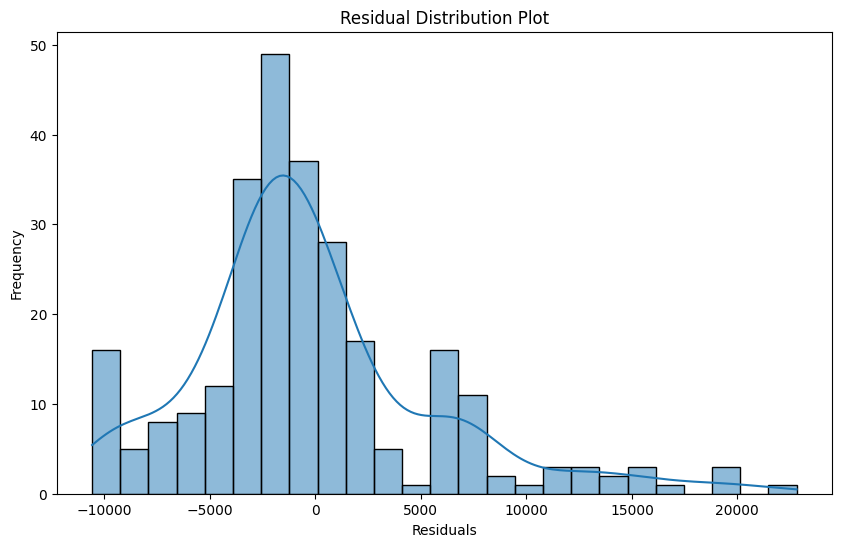

In [15]:
# Create a distribution plot of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribution Plot")
plt.show()




A roughly bell-shaped distribution with a peak near zero indicates that the residuals are normally distributed. If the distribution is skewed or has multiple peaks, it may suggest non-normality in the residuals.

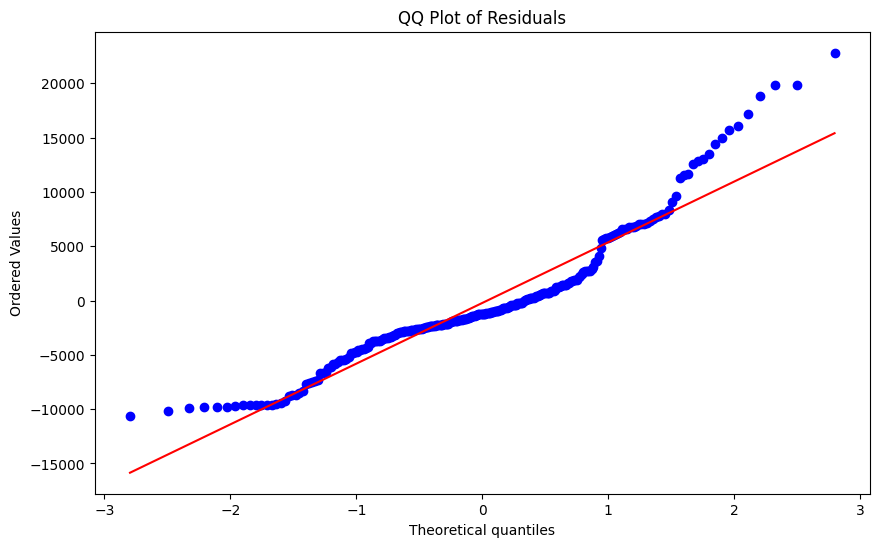

In [17]:
from scipy.stats import probplot

plt.figure(figsize=(10, 6))
probplot(residuals, dist="norm", plot=plt)
plt.title("QQ Plot of Residuals")
plt.show()

A QQ plot compares the distribution of residuals to the theoretical normal distribution. Points on the QQ plot should closely follow the diagonal line if residuals are normally distributed.

Deviations from the diagonal line suggest departures from normality. If the points deviate substantially, it may indicate non-normality in the residuals.